<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [2]:
dados = pd.read_csv('HousePrices_HalfMil.csv', sep=';')

## Visualizar os dados

In [3]:
dados.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


## Verificando o tamanho do dataset

In [4]:
dados.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [6]:
dados.describe().round(3)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.000,1000.000,1000.000,1000.00,1000.000,1000.000,1000.000
mean,41985.600,124.326,2.009,3.00,2.034,0.331,0.485
std,12140.385,72.390,0.813,1.43,1.419,0.471,0.500
min,13150.000,1.000,1.000,1.00,0.000,0.000,0.000
25%,33112.500,60.750,1.000,2.00,1.000,0.000,0.000
50%,41725.000,123.000,2.000,3.00,2.000,0.000,0.000
75%,51175.000,187.000,3.000,4.00,3.000,1.000,1.000
max,73675.000,249.000,3.000,5.00,4.000,1.000,1.000


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [7]:
dados.corr(numeric_only=True).round(4)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garagem,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
banheiros,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
lareira,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marmore,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
andares,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Importando biblioteca seaborn

In [19]:
import seaborn as sns
sns.set_palette("Accent")
sns.set_style("darkgrid")

## Variavél dependente (Y)

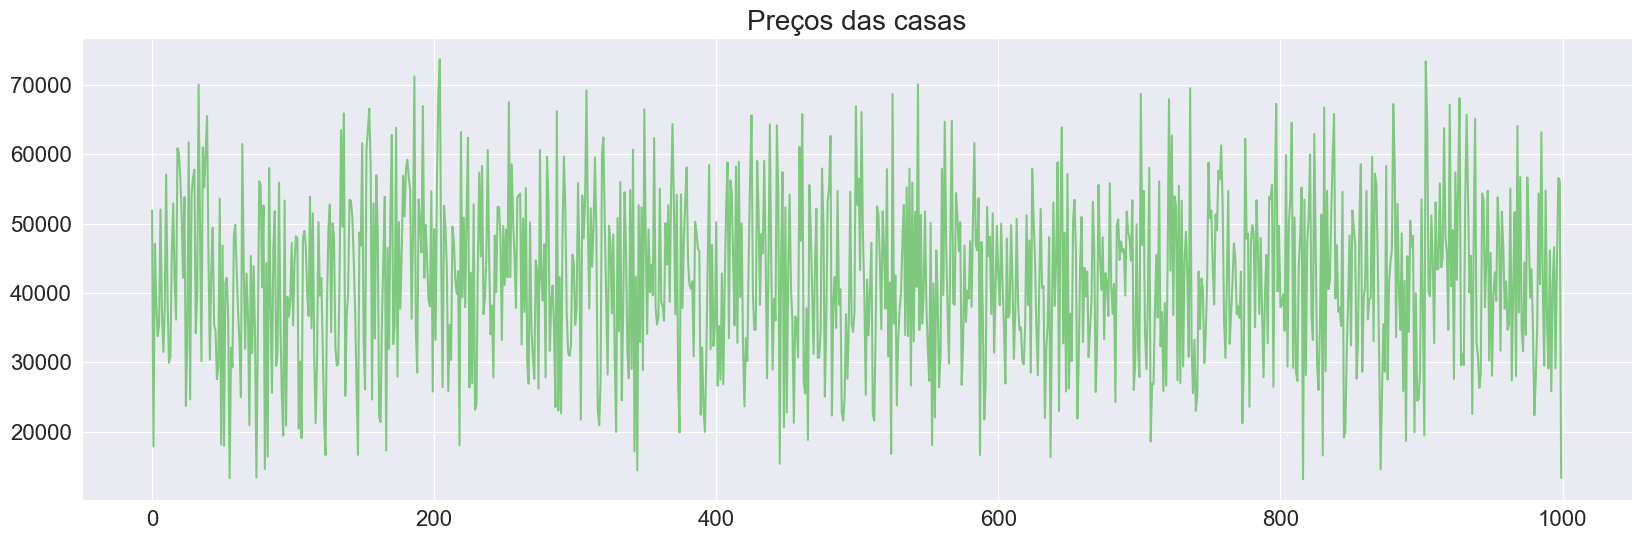

In [20]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_title('Preços das casas',fontsize=20)
ax = dados['precos'].plot(fontsize = 16)

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

Text(0, 0.5, 'Valor ($)')

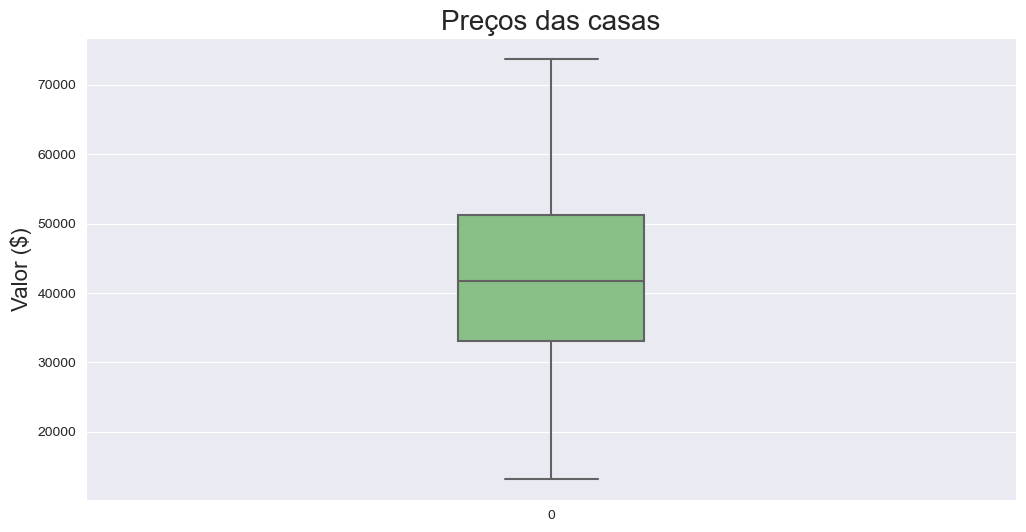

In [21]:
ax = sns.boxplot(data=dados.precos, orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preços das casas', fontsize=20)
ax.set_ylabel('Valor ($)', fontsize=16)

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

<Axes: title={'center': 'Preço'}, xlabel='Total de garagens', ylabel='Valor ($)'>

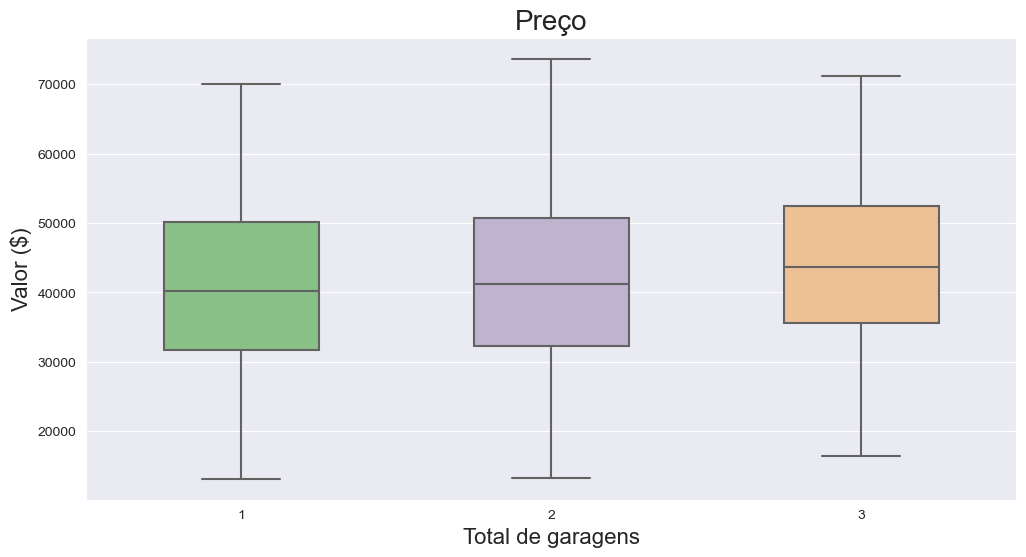

In [22]:
ax = sns.boxplot(y = 'precos', x = 'garagem', data = dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço', fontsize=20)
ax.set_ylabel('Valor ($)', fontsize=16)
ax.set_xlabel('Total de garagens', fontsize=16)
ax

### Box-plot (Preço X Banheiros)

<Axes: title={'center': 'Preço'}, xlabel='Total de banheiros', ylabel='Valor ($)'>

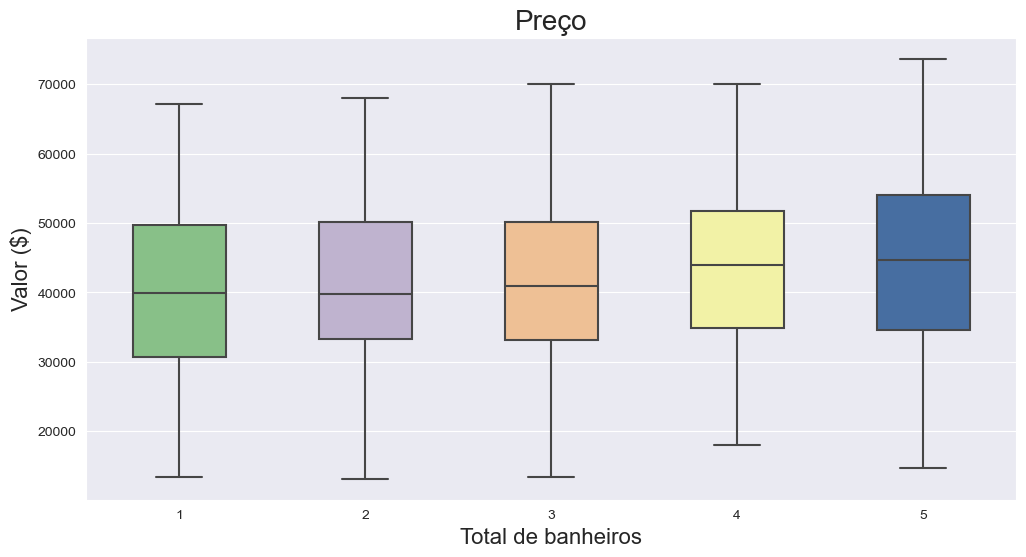

In [23]:
ax = sns.boxplot(y = 'precos', x = 'banheiros', data = dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço', fontsize=20)
ax.set_ylabel('Valor ($)', fontsize=16)
ax.set_xlabel('Total de banheiros', fontsize=16)
ax

### Box-plot (Preço X Lareira)

<Axes: title={'center': 'Preço'}, xlabel='Total de lareiras', ylabel='Valor ($)'>

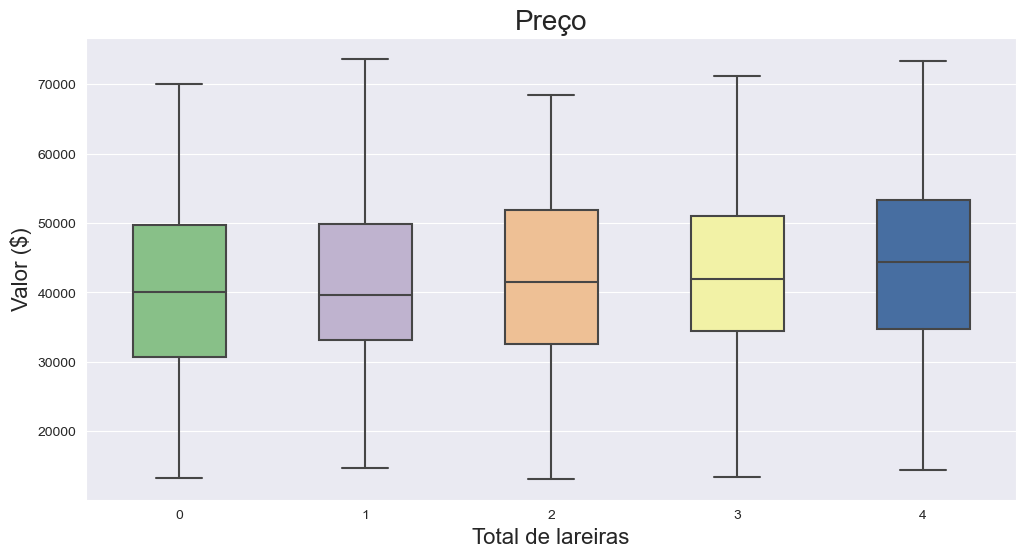

In [24]:
ax = sns.boxplot(y = 'precos', x = 'lareira', data = dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço', fontsize=20)
ax.set_ylabel('Valor ($)', fontsize=16)
ax.set_xlabel('Total de lareiras', fontsize=16)
ax

### Box-plot (Preço X Acabamento em Mármore)

<Axes: title={'center': 'Preço'}, xlabel='Acabamento em marmore', ylabel='Valor ($)'>

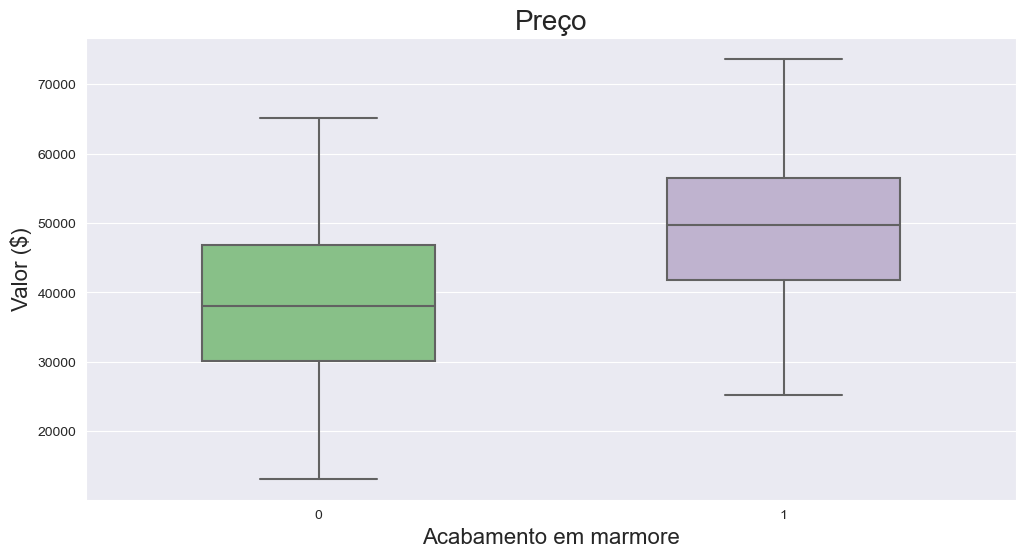

In [25]:
ax = sns.boxplot(y = 'precos', x = 'marmore', data = dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço', fontsize=20)
ax.set_ylabel('Valor ($)', fontsize=16)
ax.set_xlabel('Acabamento em marmore', fontsize=16)
ax

### Box-plot (Preço X Andares)

<Axes: title={'center': 'Preço'}, xlabel='Total de andares', ylabel='Valor ($)'>

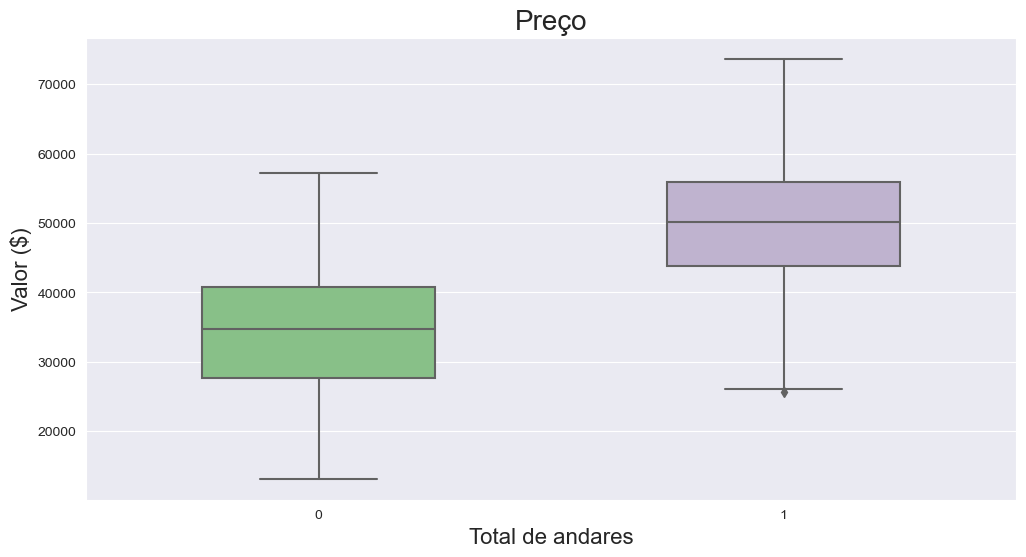

In [26]:
ax = sns.boxplot(y = 'precos', x = 'andares', data = dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço', fontsize=20)
ax.set_ylabel('Valor ($)', fontsize=16)
ax.set_xlabel('Total de andares', fontsize=16)
ax

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<Axes: title={'center': 'Distrubuição de Frequências'}, xlabel='precos', ylabel='Valor ($)'>

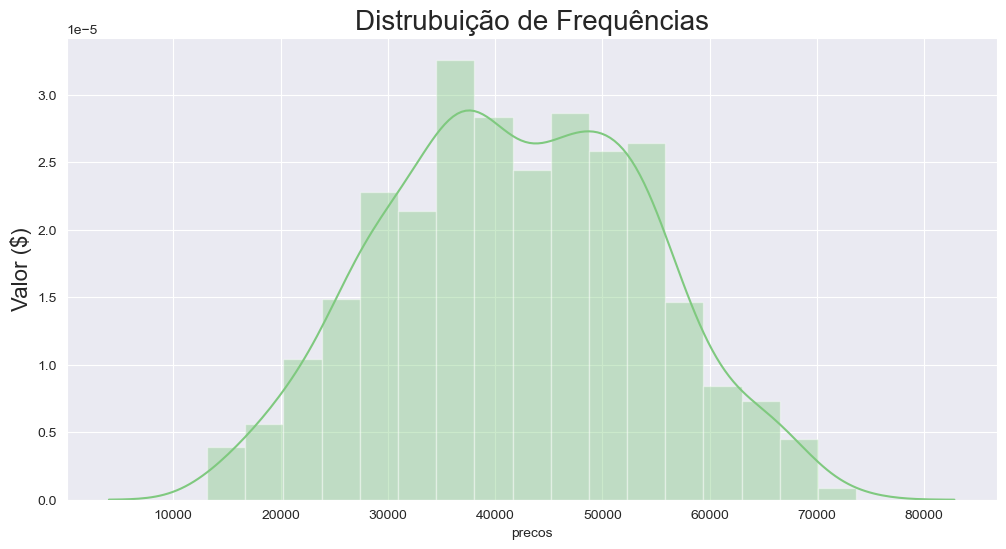

In [27]:
ax = sns.distplot(dados['precos'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distrubuição de Frequências', fontsize=20)
ax.set_ylabel('Valor ($)', fontsize=16)
ax

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

In [30]:
dados.columns

Index(['precos', 'area', 'garagem', 'banheiros', 'lareira', 'marmore',
       'andares'],
      dtype='object')

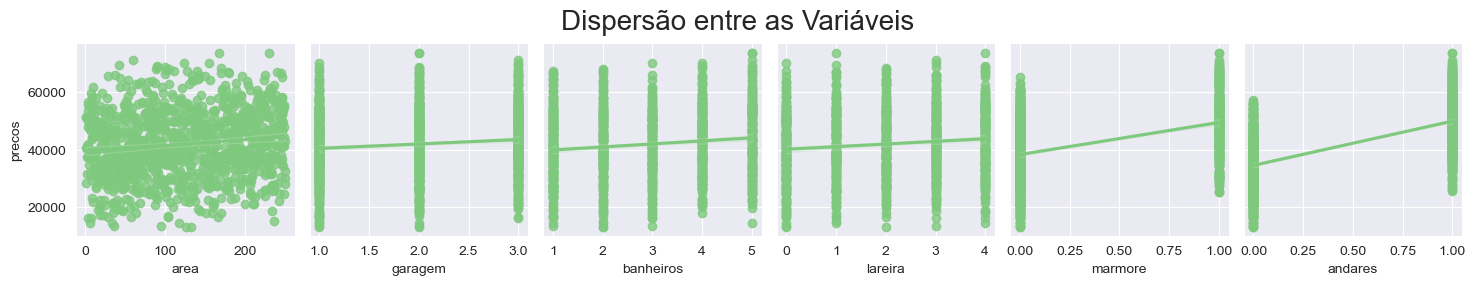

In [31]:
ax = sns.pairplot(dados, y_vars='precos', x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.1)
ax

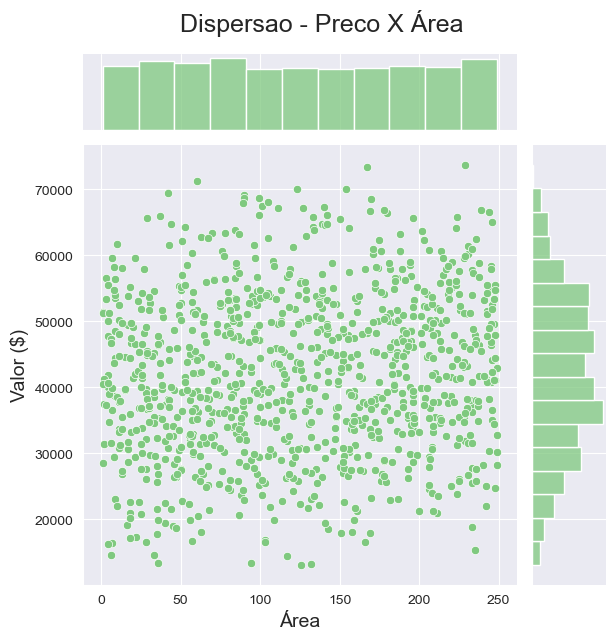

In [32]:
ax = sns.jointplot(x="area", y="precos", data=dados)
ax.fig.suptitle('Dispersao - Preco X Área', fontsize=18, y=1.05)
ax.set_axis_labels("Área", "Valor ($)", fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [33]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [36]:
y = dados.precos

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [37]:
X = dados[['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']]

## Criando os datasets de treino e de teste

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [41]:
modelo = LinearRegression().fit(X_train, y_train)
modelo.score(X_train, y_train)

0.6362135671678268

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

In [42]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.64


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [43]:
y_previsto = modelo.predict(X_test)
y_previsto

array([46389.80475709, 49010.00365852, 43738.03051808, 48175.49820495,
       39880.48586336, 50362.43014234, 42198.58116886, 28569.34782494,
       28507.4768569 , 29569.74847706, 31614.64259392, 49765.41893005,
       35044.50634148, 53891.05438337, 52900.02473153, 41868.8207063 ,
       29082.36353522, 44968.87219785, 55868.25485371, 46773.4471388 ,
       37809.78729393, 44061.14912857, 45460.1932125 , 48113.43460826,
       58942.55368614, 41190.92543608, 47212.63200477, 33329.82804168,
       50540.95681088, 33290.57951719, 57495.5722522 , 39948.63486438,
       26567.02507679, 50711.51821411, 34955.20454735, 46732.30951494,
       46273.73600791, 49846.60007848, 57845.6479527 , 38320.81031792,
       37162.64435133, 44093.59543321, 30223.16945263, 35528.29116804,
       56554.22821455, 36578.32564088, 47911.85680888, 32437.55888331,
       33358.63947649, 49464.97705028, 54062.43879656, 30810.74863279,
       40028.51137106, 27330.79571   , 26502.28661904, 39292.9066832 ,
      

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [44]:
print('R² =%s' % metrics.r2_score(y_test, y_previsto).round(2))

R² =0.67


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [48]:
area = 100
garagem = 3
banheiros = 3
lareira = 1
marmore = 1
andares = 2

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]
print('{0:.2f} $'.format(modelo.predict(entrada)[0]))

72441.30 $


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Análise gráficas das previsões do modelo

In [51]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

<Axes: title={'center': 'Previsão X Real'}, xlabel='Valor($) - Previsão', ylabel='Valor($) - Real'>

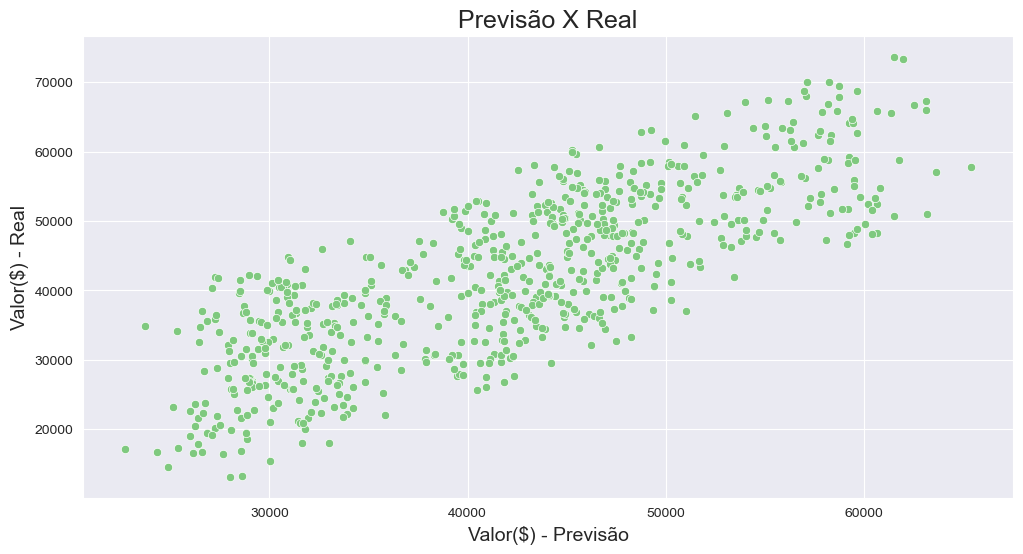

In [52]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Valor($) - Previsão', fontsize=14)
ax.set_ylabel('Valor($) - Real', fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

In [53]:
import pickle

## Salvando o modelo estimado

In [54]:
output = open('modelo_valor_imoveis', 'wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```